In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('carprices.csv')
df.head(3)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5


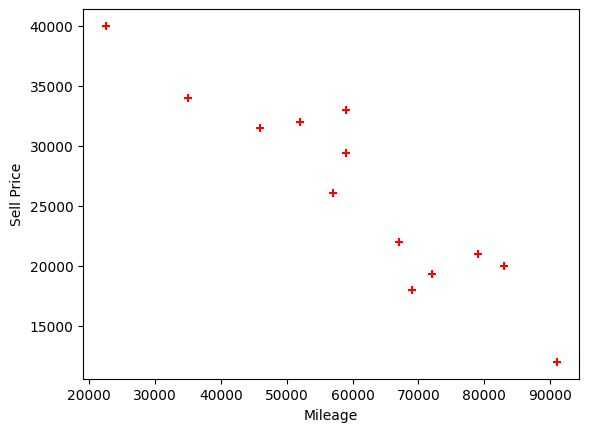

In [3]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price')
plt.scatter(df.Mileage, df[['Sell Price($)']], color='red', marker='+')

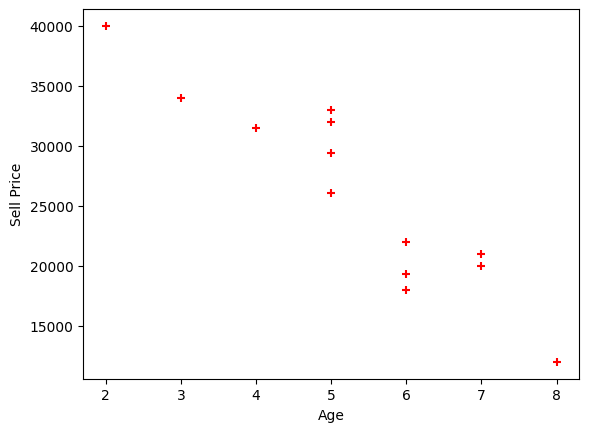

In [4]:
plt.xlabel('Age')
plt.ylabel('Sell Price')
plt.scatter(df[['Age(yrs)']], df[['Sell Price($)']], color='red', marker='+')

In [5]:
dummies = pd.get_dummies(df[['Car Model']], drop_first=True)
dummies = dummies.apply(lambda x: x.astype(int))
dummies

,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [6]:
merged = pd.concat([df, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,1,0
1,BMW X5,35000,34000,3,1,0
2,BMW X5,57000,26100,5,1,0
3,BMW X5,22500,40000,2,1,0
4,BMW X5,46000,31500,4,1,0
5,Audi A5,59000,29400,5,0,0
6,Audi A5,52000,32000,5,0,0
7,Audi A5,72000,19300,6,0,0
8,Audi A5,91000,12000,8,0,0
9,Mercedez Benz C class,67000,22000,6,0,1


In [7]:
df = merged.drop(['Car Model'], axis='columns')
df

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
X = df.drop(['Sell Price($)'], axis='columns')
y = df['Sell Price($)']

In [10]:
model.fit(X, y)

LinearRegression()

In [11]:
model.score(X, y)

0.9417050937281082

In [14]:
model.predict([[45000, 4, 0, 1]])

C:\Users\Shankha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [15]:
model.predict([[86000, 7, 1, 0]])

C:\Users\Shankha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()

In [17]:
rfc.fit(X, y)

RandomForestRegressor()

In [18]:
rfc.score(X, y)

0.9684379720488255

In [22]:
rfc.predict([[86000, 7, 1, 0]])

C:\Users\Shankha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([18180.])

In [23]:
rfc.predict([[45000, 4, 0, 1]])

C:\Users\Shankha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([32272.])

In [19]:
import pickle

In [21]:
pickle.dump(rfc, open('model.pkl', 'wb'))